# Random Forests

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
df = pd.read_csv('penguins_simple.csv', sep=';')b

In [32]:
df.head()


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [3]:
train, test = train_test_split(df)

#### 1. Inspect the shape of the train and test DataFrames

In [4]:
train.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
270,Gentoo,45.5,15.0,220.0,5000.0,MALE
327,Gentoo,48.8,16.2,222.0,6000.0,MALE
116,Adelie,40.2,17.0,176.0,3450.0,FEMALE
150,Chinstrap,52.7,19.8,197.0,3725.0,MALE
211,Chinstrap,49.6,18.2,193.0,3775.0,MALE


In [5]:
train.shape

(249, 6)

### Train a Baseline Model

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
# we can extract columns only now, because we want to sample below
Xtrain = train[['Flipper Length (mm)', 'Culmen Length (mm)']]
ytrain = train['Species']
Xtest = test[['Flipper Length (mm)', 'Culmen Length (mm)']]
ytest = test['Species']

#### 2. Train a Decision Tree with maximum depth 4

In [8]:
m = DecisionTreeClassifier(max_depth=4)
m.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=4)

#### 3. Calculate training and test accuracy

In [9]:
print('train acc', round(m.score(Xtrain, ytrain), 3))
print('test acc ', round(m.score(Xtest, ytest), 3))

train acc 0.98
test acc  0.905


### Train a Random Forest from Scratch

#### 4. Build a list of trees

Repeat the following 100 times:
    
* draw 50 random penguins (with `df.sample()`)
* train a decision tree on the sample with `max_depth=3`
* add the tree to the forest

In [11]:
forest = []

for i in range(100):
    sample = train.sample(50)
    X = sample[['Flipper Length (mm)', 'Culmen Length (mm)']]
    y = sample['Species']
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X,y)
    forest.append(tree)
    

#### 5. Calculate a list of training scores for all trees on the full training set

In [12]:
trainscores = [tree.score(Xtrain, ytrain) for tree in forest]

max(trainscores), min(trainscores)

(0.9598393574297188, 0.8473895582329317)

#### 6. Calculate the mean training score
is the mean score better or worse than the baseline?

In [14]:
print('mean train acc ', round(sum(trainscores)/len(trainscores), 3))

mean train acc  0.92


#### 7. Calculate the mean test score in the same way
is the mean score better or worse than the baseline?

In [16]:
testscores = [tree.score(Xtest, ytest) for tree in forest]
print('mean test acc ', round(sum(testscores)/len(testscores), 3))


mean test acc  0.907


### Majority Vote

#### 8. Create a list of predictions for every tree

In [19]:
preds = [tree.predict(Xtest) for tree in forest]
len(preds)

100

#### 9. Convert the list into a DataFrame
Inspect the result

* The shape of the DF should be (100, 84)
* What do the dimensions of the DF mean?
* Do the trees predictions are in agreement?

In [22]:
all_preds = pd.DataFrame(preds)
all_preds.shape
all_preds.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,Chinstrap,Gentoo,Adelie,Adelie,Chinstrap,Gentoo,Gentoo,Adelie,Chinstrap,Chinstrap,...,Adelie,Adelie,Adelie,Adelie,Gentoo,Gentoo,Gentoo,Adelie,Chinstrap,Adelie
1,Chinstrap,Gentoo,Adelie,Adelie,Chinstrap,Gentoo,Gentoo,Adelie,Adelie,Adelie,...,Adelie,Adelie,Adelie,Adelie,Gentoo,Gentoo,Gentoo,Adelie,Adelie,Adelie
2,Chinstrap,Gentoo,Adelie,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Chinstrap,Chinstrap,...,Adelie,Adelie,Adelie,Adelie,Gentoo,Gentoo,Gentoo,Adelie,Chinstrap,Adelie
3,Chinstrap,Gentoo,Adelie,Chinstrap,Chinstrap,Gentoo,Gentoo,Adelie,Chinstrap,Chinstrap,...,Adelie,Adelie,Adelie,Adelie,Gentoo,Gentoo,Gentoo,Adelie,Chinstrap,Adelie
4,Chinstrap,Gentoo,Adelie,Adelie,Chinstrap,Gentoo,Gentoo,Adelie,Chinstrap,Chinstrap,...,Adelie,Adelie,Adelie,Adelie,Gentoo,Gentoo,Gentoo,Adelie,Chinstrap,Adelie


#### 10. Calculate accuracy from most frequent prediction on each data point
* Is the overall accuracy better than the accuracy of the baseline?
* Do you have more or less overfitting?

In [23]:
ypred = all_preds.mode().T[0]
print('majority vote test score:', accuracy_score(ypred, ytest))

majority vote test score: 0.9404761904761905


## RandomForest with Scikit

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [27]:
importance=rf.feature_importances_

In [28]:
list(zip(importance, Xtrain.columns))

[(0.4574326437181143, 'Flipper Length (mm)'),
 (0.5425673562818857, 'Culmen Length (mm)')]

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Culmen Length (mm)'>

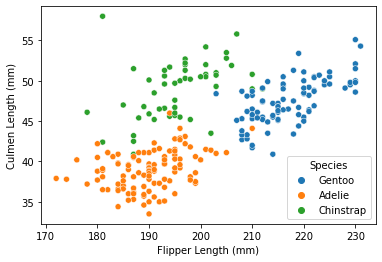

In [30]:
import seaborn as sns
sns.scatterplot(x=Xtrain['Flipper Length (mm)'], y=Xtrain['Culmen Length (mm)'], hue=ytrain)